In [1]:
#sklearn is a machine learning package, it has a few sample datasets in it, so we'll use it here
from sklearn import datasets
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np

## Basic Histograms

Histograms are one of the most basic and useful visualizations that we use in statistics. It allows us to clearly visualize the distribution of a variable - what values our variable can take on. 

A histogram is a very simple bar chart, one that always has a couple of features:
<ul>
<li> The value we are looking at is along the X axis. If it is a continuous value (e.g. height, weight, salary), the value is "binned" or broken into segments - i.e. for weight you may have 10kg bins, and every value between 80kg and 90kg are in one bar. 
<li> The count of how many times that value occurs (# of instances or records in the dataset) is on the Y axis. 
</ul>

So, a histogram is just a chart of a count of "how many records have this value".

![Histogram](images/histogram.png "Histogram")

A histogram is useful, and very commonly used, because it allows us to easily and quickly get an idea of the shape of our data. 

### Load Data 

We'll load in one of the sample datasets from a package called scikitlearn. 
The loading part below, to get it into a dataframe is something that you can just Google - "load sklearn boston dataset python". We'll use sklearn a lot later on into the machine learning class. 

All of the variables in this data are metrics of housing quality - things like polution measures, tax levels, age of homes, etc... We can also Google for a detailed dictionary as this is a common example dataset, we don't really need much specific knowledge on the meaning of the data examine the stats!

In [2]:
tmp = datasets.load_boston()
df = pd.DataFrame(tmp['data'], columns=tmp.feature_names)
#df.head()
df

c:\Users\toluw\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


We'll look at the number of rooms first...

In [3]:
df["RM"].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

In [4]:
df["RM"].value_counts().sort_index()

3.561    1
3.863    1
4.138    2
4.368    1
4.519    1
        ..
8.375    1
8.398    1
8.704    1
8.725    1
8.780    1
Name: RM, Length: 446, dtype: int64

### Histograms to Visualize Distribution

This sucks to look at. There has to be a better way!!

![Falling](images/couch_better_way.gif)

The thinkstats package gives us a shortcut function to generate a histogram. We first create a "hist" object that is a data structure defined by thinkstats to hold distribution data - it is a souped up dictionary (you'll do that in more detail in the programming class). Once we have made the hist object, we can call a function to draw it. 

##### Generating Hist Objects

The first step is to create an object to store the histogram data. This is basically a souped up dictionary. 

The round is an example of a statistical technique called binning - we are grouping all the values that are between 3.0 and 3.9999 into one "bin", all the "4s", in another, etc... Because we are looking at a continuous variable with a discreet tool (a histogram), this binning process does that translation. The size of the bins is a judgement call. Printing a list of all the values after this binning makes it much more digestable. 

In [5]:
#hist = thinkstats2.Hist(np.floor(df["RM"]), label='Rooms')
hist = thinkstats2.Hist(round(df["RM"],1), label='Rooms')
hist

Hist({5.9: 47, 6.0: 42, 6.2: 42, 6.4: 39, 6.1: 37, 6.3: 27, 6.5: 26, 6.6: 24, 5.8: 21, 5.6: 20, 5.7: 18, 6.8: 17, 6.7: 16, 7.0: 16, 5.4: 10, 7.2: 10, 6.9: 10, 7.1: 8, 5.5: 7, 5.0: 7, 7.3: 6, 5.3: 6, 7.8: 5, 7.4: 5, 7.9: 4, 8.3: 4, 4.9: 4, 7.5: 4, 8.4: 2, 4.1: 2, 5.2: 2, 7.6: 2, 8.0: 2, 8.7: 2, 7.7: 2, 4.5: 1, 4.6: 1, 4.7: 1, 4.4: 1, 8.8: 1, 3.9: 1, 3.6: 1, 8.2: 1, 8.1: 1, 5.1: 1}, 'Rooms')

##### Drawing Histogram

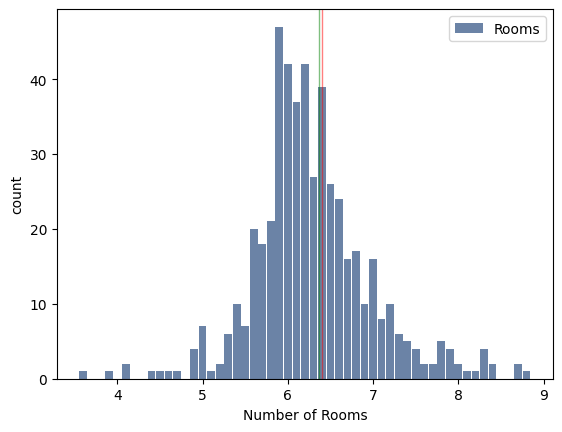

In [6]:
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Number of Rooms', ylabel='count')
thinkplot.axvline(np.mean(hist), color="green")
thinkplot.axvline(np.median(hist), color="red")

#### Histograms and Basic Stats

Histograms are very useful for gaining a basic understanding of our data, in several ways:
<ul>
<li> "Shape" of the data, or its distribution. 
<li> Basic Statistics - mean and median can be estimated (they are shown by vertical lines above)
<li> Dispersion - is the data spread out or compacted (measured by varaiance and standard deviation)
<li> Outliers - is anything really big or really small. 
</ul>

Most critically, we can generally see what type of pattern our data follows just by looking at it in a histogram. Our data here fits a common pattern, it is (roughly) normally distributed - meaning that it's distribution is more or less a bell shape, with most records in the middle, and fewer and fewer as we move progressively farther from the mean. 

This visual inspection of our data in a histogram (or a similar visualization) is one of the most common things that we will do with data. 

#### Simple Stats

We can also generate the basic statistics for the data

In [7]:
# Variance
print(df["RM"].var())
# Standard deviation 
print(df["RM"].std())
# Mean 
print(df["RM"].mean())
# Median 
print(df["RM"].median())

0.4936708502211095
0.7026171434153237
6.284634387351787
6.2085


#### Try It

With the "tax" value, generate a histogram as well as the basic statistics. Look at the distribution and see if it presents anything that you can understand in "real life" - is there anything you can think of that may help to resolve it so you can analyze the data better? If so, give it a shot. 

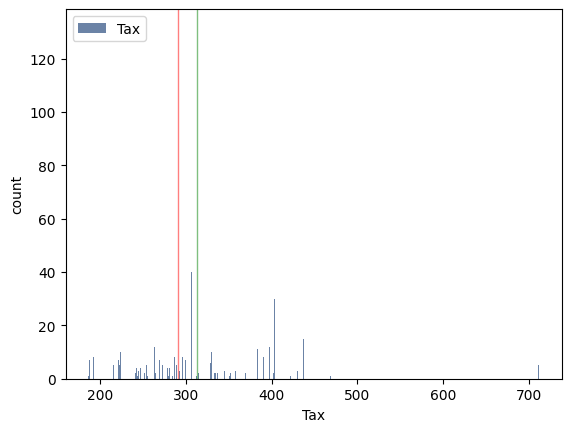

In [8]:
tax_hist = thinkstats2.Hist(round(df["TAX"],1), label='Tax')
thinkplot.Hist(tax_hist)
thinkplot.Config(xlabel='Tax', ylabel='count')
thinkplot.axvline(np.mean(tax_hist), color="green")
thinkplot.axvline(np.median(tax_hist), color="red")

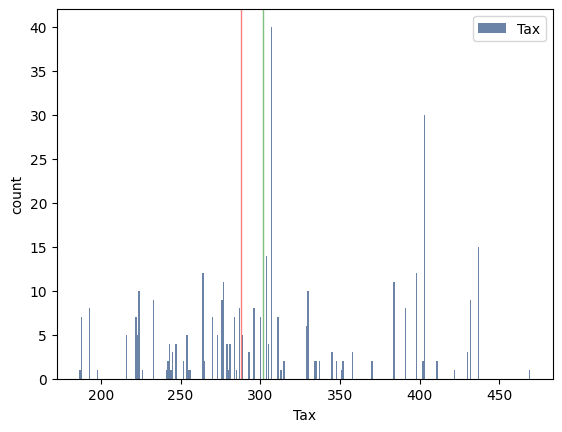

In [9]:
temp = df[df["TAX"] < 500]
tax_hist = thinkstats2.Hist(round(temp["TAX"],1), label='Tax')

thinkplot.Hist(tax_hist)
thinkplot.Config(xlabel='Tax', ylabel='count')
thinkplot.axvline(np.mean(tax_hist), color="green")
thinkplot.axvline(np.median(tax_hist), color="red")

## Spliting Samples

A very common type of analysis that we want to do is based on looking at two or more subsets in our dataset. For example, we may want to compare the lifetime earnings between people with high school vs college vs university vs graduate degreees. In a medical study we want to see how many vaccinated people get die vs how many unvaccinated people die. Comparisons of groups, and evaluating if there is a significant difference in what we see in the data between the different groups, is very common and important. 

#### Are homes by the river bigger?

First, we can take a look at how the two different sets of houses (river vs no river) are distributed. The first step is to split the data using the varaible that tells us if we are by the river. 

In [10]:
river = df[df["CHAS"] ==1 ]
noRiver = df[df["CHAS"] != 1]

In [11]:
riverHist = thinkstats2.Hist(np.floor(river["RM"]), label="Riverside")
landHist = thinkstats2.Hist(np.floor(noRiver["RM"]), label="Landlocked")

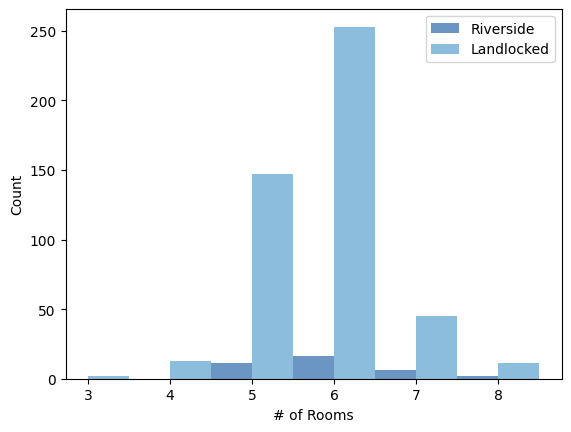

In [12]:
width = 0.5
thinkplot.PrePlot(2)
thinkplot.Hist(riverHist, align='right', width=width)
thinkplot.Hist(landHist, align='left', width=width)
thinkplot.Config(xlabel='# of Rooms', ylabel='Count')

What can we gather from this?

In [13]:
print(river["RM"].describe())
print(noRiver["RM"].describe())

count    35.000000
mean      6.519600
std       0.876416
min       5.012000
25%       5.935500
50%       6.250000
75%       6.915000
max       8.780000
Name: RM, dtype: float64
count    471.000000
mean       6.267174
std        0.685895
min        3.561000
25%        5.882000
50%        6.202000
75%        6.594000
max        8.725000
Name: RM, dtype: float64


In [14]:
river["RM"].mean() - noRiver["RM"].mean()

0.2524259023354505

#### They look different, but... 

Here we have two subsets, there is a difference in their means, but there is a bunch of other info that is confusing things. The number of homes in each group is very different; the shape of the distribution isn't very easy to compare when the two are graphed together. 

Luckily we have other tools we can use to evaluate if this difference is significant. One that we will regularly use is called the effect size. 

### Evaluating Differences in Subgroups

One thing we can see is that different subgroups may have different distributions - this is a common and important thing that we may want to investigate. For example, do people who take a medicince have a longer lifespan than people who take a placebo. Examining this difference and its importance is a big topic, one thing that we can look at now is called the Effect Size - a measure of how substantial the difference between two groups is. 

This is a very useful thing to be able to do - if you are examining the death rate of people who got a treatment vs people who didn't, a statistic like "the non-treated population dies at a rate .087 higher than the treated population" doesn't communicate anything substantial unless we can establish if that difference has substantial meaning.

In [15]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [16]:
CohenEffectSize(river["RM"], noRiver["RM"])

0.3602262108444541

#### Effect Size... Sizes

Effect size values can be judged on a scale, the higher the number, the larger the difference. Or in "effect" terms - if we see a big effect size, that is an indication that whatever the differentiator between the two samples is (e.g. often something like one group took a drug, the other took a placebo) significant, or it had an effect. 

There aren't really exact cutoffs for "big" or "small" in effect size, a rough guideline is:
<ul>
<li> < 0.3 - small effect size. 
<li> 0.3 - 0.5 - medium effect size. 
<li> > 0.5 - large effect size
</ul>

Again, these cutoffs are not exact; we will look at determining if there is a significant difference in two samples in more depth in a few weeks. 

We can also visualize the effect sizes via a graph:

![Effect Size](images/effect_size_chart.jpg)

#### Try It

Use the "CRIM" column to separate the dataset into greater and lesser than .05, then do a similar comparison to above - which subset has more rooms? Include histogram(s) to illustrate the two distributions. 

In [17]:
low = df[df["CRIM"] <= .05 ]
high = df[df["CRIM"] > .05]

In [18]:
lowHist = thinkstats2.Hist(np.floor(low["RM"]), label="Riverside")
highHist = thinkstats2.Hist(np.floor(high["RM"]), label="Landlocked")

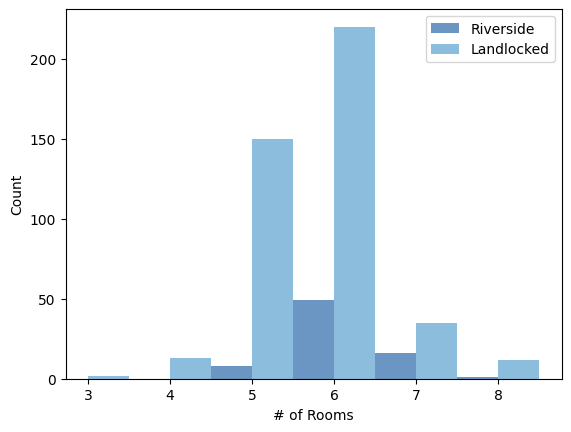

In [19]:
width = 0.5
thinkplot.PrePlot(2)
thinkplot.Hist(lowHist, align='right', width=width)
thinkplot.Hist(highHist, align='left', width=width)
thinkplot.Config(xlabel='# of Rooms', ylabel='Count')

In [20]:
print(low["RM"].describe())
print(high["RM"].describe())

count    74.000000
mean      6.623676
std       0.561237
min       5.663000
25%       6.177500
50%       6.570000
75%       6.973250
max       8.034000
Name: RM, dtype: float64
count    432.000000
mean       6.226558
std        0.708494
min        3.561000
25%        5.856750
50%        6.152500
75%        6.528250
max        8.780000
Name: RM, dtype: float64
